Name: Kagen Lim

Completed as Assignment #3:  Write up a report that predicts Covid misinformation on twitter.

Contact: [kagen.lim@columbia.edu](mailto:kagen.lim@columbia.edu)

GitHub Repo: https://github.com/kagenlim/Advanced-Machine-Learning

In this notebook, I explore a labelled dataset of Tweets, and build multiple deep learning model on this data. Given that this is a dataset of Twitter data, this would involve building models that can analyze textual data. Specifically, given the textual data is sequential in nature (i.e., the ordering of words when forming sentences is a fundamental part of human language), I explore Recurrent Neural Networks that are adept at processing such sequential data.

The dataset used in this notebook was obtained from this publication: 
```
Shahi, Gautam Kishore, Anne Dirkson, and Tim A. Majchrzak. "An exploratory study of Covid-19 misinformation on twitter." Online Social Networks and Media 22 (2021): 100104.
```

## Data Description and Examples

In [ ]:
#Source:Fighting an Infodemic: COVID-19 Fake News Dataset, https://github.com/diptamath/covid_fake_news,https://arxiv.org/abs/2011.03327 

import pandas as pd
trainingdata=pd.read_csv("https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/Constraint_Train.csv", usecols = ['tweet','label'])
testdata=pd.read_csv("https://raw.githubusercontent.com/diptamath/covid_fake_news/main/data/english_test_with_labels.csv", usecols = ['tweet','label'])

In [ ]:
trainingdata.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


### Examples of Real Tweets

In [ ]:
training_real_example = trainingdata[trainingdata.label=='real'].sample(n=2)

In [ ]:
test_real_example = testdata[testdata.label=='real'].sample(n=2)

In [ ]:
print(str(training_real_example.tweet.values))

['#NewZealand is seen as a global exemplar and over the weekend Prime Minister @jacindaardern celebrated 100 days with no #COVID19 community transmission while stressing the need to remain cautious-@DrTedros https://t.co/H8s06iPxM0'
 'WEEKLY UPDATE: #COVID19 #Coronavirus ➡️Short-term forecasts of COVID-19 deaths in multiple countries 🔰Read full report here: https://t.co/cTwAd9ZwTS @sangeeta0312 @PNouvellet @krisparag1 @neil_ferguson https://t.co/ZLEkWIgTCV']


In [ ]:
print(str(test_real_example.tweet.values))

['Having a difficult time coping because of #COVID19? Feeling lonely anxious or dealing with grief and loss? Help is available through the National #Suicide Prevention Lifeline (800-273-8255). Learn more: https://t.co/F0vQ2lbmUj. https://t.co/VU7ygNPlXJ'
 '🆕 UPDATE: COVID-19 investigational drugs and therapies. https://t.co/M3p8I9CrmF https://t.co/wm4z6SciMO']


Three of these four tweets, labelled as 'real' and randomly sampled from the training and test sets, seem to be centred around news updates (both medical news and world news regarding COVID-19). One of these four 'real' tweets with genuine information is about mental health advice, regarding suicide prevention, in dealing with the severe mental health consequences of social isolation and grief due to COVID-19.

### Examples of Fake Tweets

In [ ]:
training_fake_example = trainingdata[trainingdata.label=='fake'].sample(n=2)

In [ ]:
test_fake_example = testdata[testdata.label=='fake'].sample(n=2)

In [ ]:
print(str(training_fake_example.tweet.values))

['Renowned cardiac surgeon Dr Devi Shetty has issued a list of 22 suggestions to be followed for one year to protect oneself against coronavirus.'
 'Piltdown President Says Virus Will Go Away https://t.co/RzRktiNhsS']


In [ ]:
print(str(test_fake_example.tweet.values))

['"Eating salt frequently protects from corona infection better than wearing a mask."'
 'How much you wanna bet this is be the cure for the Coronavirus disease (COVID-19)? All I ask is to make sure I get the credit for coming up with this magical cure all']


These four tweets were also randomly sampled from the training and test datasets. They were labelled as 'fake'. Indeed, all four them seem to revolve around fake information on various cures for COVID-19 or false information on the severity of the virus. 




### Dataset Size

In [ ]:
len(trainingdata) #Number of Tweets in Training Data

6420

In [ ]:
len(testdata) #Number of Tweets in Test Data

2140

## Why Deep Learning is a Suitable Tool

Manually labelling tweets as 'false' or 'true' would clearly take a huge amount of effort and cost, given the rapidity of communication on Twitter across the world. This is a problem; the proliferation of misinformation on Twitter has the potential to cause the widespread adoption of online falsehoods. This has negative effects on the world's response to COVID-19, which does require the cooperation of as many people as possible. 

The application of deep learning is particularly apt for this problem. The simple exploration of Tweets done in the section above does show that there are potential features which distinguish between authentic and false news tweets -- authentic tweets generally try to inform and, on average, might be more likely to include some words (e.g., regarding news updates, or regarding the need to be careful or seek help; false news tweets, on the other hand, might be associated with an entirely different set of words (e.g., regarding purchasing some given products, or how the situation is not serious).

Recurrent neural networks for text data are especially apt at detecting such patterns. They are not only adept at processing tokenized text data (e.g., at the word level) that is fed into these models, this set of model architecture are also able to capture sequences of text in the data (i.e., the context around each word), especially when word embedding layers are used.  

The successful building of such a model would be vastly useful for tackling misinformation on Twitter, in a fairly automated way. The successful implementation of suchs a model will be beneficial for social media companies or governments that need to constantly sift through a large amount of textual data, to make sense of misinformation.

## Modelling Goals in this Notebook

After preprocessing, I build four different recurrent neural network layers, with different configurations of stacked long-short term memory (LSTM) layers, bidirectional LSTM layers, LSTM layers with dropout regularization, embedding layers and one-dimensional convolutional layers.

My most successful models are submitted to an online repository, AIModelShare. I reflect on how my model architectures might be improved. I also test out my best model on entirely new text data, to simulate the application of this model (trained on 6420 Tweets and evaluated on a held-out set of 2140 Tweets) could go well beyond these Tweets here, to other new Tweets that are being continually generated; this is a test of the external validity of this model.

I fit the following models to the training data:
> Model 1: One Embedding Layer --> Stacked LSTM Layers (Two Layers)

> Model 2: One Embedding Layer --> Stacked LSTM Layers (Two Layers, with Dropout Regularization on the second one)

> Model 3: One Embedding Layer --> One Conv1D Layer --> Stacked LSTM Layers (Two Layers, with Dropout Regularization on the second one) 

> Model 4: One Embedding Layer --> Stacked LSTM Layers (Two Layers, with the first one as a Bidirectional LSTM Layer and the second one as a LSTM Layer with Dropout Regularization)


## Preprocessor

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Build vocabulary from training text data
tokenizer = Tokenizer(num_words=10000) #words for the tokenizer
tokenizer.fit_on_texts(trainingdata.tweet)

# preprocessor tokenizes words and makes sure all documents have the same length
def preprocessor(data, maxlen, max_words):

    sequences = tokenizer.texts_to_sequences(data)

    word_index = tokenizer.word_index
    X = pad_sequences(sequences, maxlen=maxlen)

    return X

In [ ]:
#defining value globally for use in embeddings
maxlen = 40
max_words = 10000 #more than enough for twitter
embedding_dim = 100 # change if you use txt files using larger number of features

## Training and Test Data

In [ ]:
trainingdata.label.value_counts() 

real    3360
fake    3060
Name: label, dtype: int64

In [ ]:
testdata.label.value_counts()

real    1120
fake    1020
Name: label, dtype: int64

In [ ]:
# tokenize and pad X data
X_train = preprocessor(trainingdata.tweet, maxlen=40, max_words=10000)
X_test = preprocessor(testdata.tweet, maxlen=40, max_words=10000)

# ohe encode Y data
y_train = pd.get_dummies(trainingdata.label)
y_test = pd.get_dummies(testdata.label)

In [ ]:
X_train[0:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1,  150,  305,  292, 7344,   35,    7,  532,    1, 7345,    7,
         143, 1277,  266,  489, 1789,   16,  752,    9, 7346,    1,  143,
         718,  610,   27, 1790,  972,   29,   62],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   42,   51, 7347,
          35,    8,  752,  480,   20,  102, 1111, 2563,   42,   51, 7348,
           2,  176,   35,    5,    3,    4, 7349]], dtype=int32)

In [ ]:
y_train[0:2]

,fake,real
0,0,1
1,0,1


In [ ]:
print(X_train.shape)
print(X_test.shape)

(6420, 40)
(2140, 40)


## Four Prediction Models

In [ ]:
#eval code
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

### Model 1: One Embedding Layer --> Stacked LSTM Layers (Two Layers)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding,Flatten, LSTM
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32, activation='tanh', return_sequences=True))
model.add(LSTM(50, activation='tanh'))
model.add(Dense(40, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 100)           1000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 40, 32)            17024     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 82        
Total params: 1,035,746
Trainable params: 1,035,746
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping 
mc = ModelCheckpoint('best_model_embeddings_stacked.h5', monitor='acc',mode='max', verbose=1, save_best_only=True) 
red_lr= ReduceLROnPlateau(monitor='acc',patience=2,verbose=1,factor=0.5, min_lr=0.001)
es = EarlyStopping(monitor='acc', mode='max', verbose=1, patience=5)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=30, #quite extreme value, but lowering batch size seemed to improve this in previous iterations
                    verbose=1,callbacks=[es,mc,red_lr])

Epoch 1/100
214/214 [==============================] - 4s 10ms/step - loss: 0.4055 - acc: 0.8062

Epoch 00001: acc improved from -inf to 0.87866, saving model to best_model_embeddings_stacked.h5
Epoch 2/100
214/214 [==============================] - 2s 10ms/step - loss: 0.1253 - acc: 0.9535

Epoch 00002: acc improved from 0.87866 to 0.95249, saving model to best_model_embeddings_stacked.h5
Epoch 3/100
214/214 [==============================] - 2s 9ms/step - loss: 0.0758 - acc: 0.9717

Epoch 00003: acc improved from 0.95249 to 0.96963, saving model to best_model_embeddings_stacked.h5
Epoch 4/100
214/214 [==============================] - 2s 9ms/step - loss: 0.0531 - acc: 0.9805

Epoch 00004: acc improved from 0.96963 to 0.98006, saving model to best_model_embeddings_stacked.h5
Epoch 5/100
214/214 [==============================] - 2s 9ms/step - loss: 0.0437 - acc: 0.9839

Epoch 00005: acc improved from 0.98006 to 0.98458, saving model to best_model_embeddings_stacked.h5
Epoch 6/100
214/

In [ ]:
y_val = y_test.idxmax(1)

In [ ]:
y_pred1 = model.predict(X_test)

prediction_index= np.argmax(y_pred1,axis=1)

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))

In [ ]:
model_eval_metrics(y_val,predicted_labels1,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.948598,0.948507,0.948351,0.948704,0,0,0,0


### Model 2: One Embedding Layer --> Stacked LSTM Layers (Two Layers, with Dropout Regularization on the second one)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding,Flatten, LSTM
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(60, activation='tanh', return_sequences=True))
model.add(LSTM(60, dropout=0.2, recurrent_dropout=0.2, activation='tanh'))
model.add(Dense(40, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 100)           1000000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 40, 60)            38640     
_________________________________________________________________
lstm_6 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense_4 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 82        
Total params: 1,070,202
Trainable params: 1,070,202
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping 
mc = ModelCheckpoint('best_model_embeddings.h5', monitor='acc',mode='max', verbose=1, save_best_only=True) 
red_lr= ReduceLROnPlateau(monitor='acc',patience=2,verbose=1,factor=0.5, min_lr=0.001)
es = EarlyStopping(monitor='acc', mode='max', verbose=1, patience=3)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=30,
                    verbose=1,callbacks=[es,mc,red_lr])

Epoch 1/100
214/214 [==============================] - 28s 112ms/step - loss: 0.4113 - acc: 0.8187

Epoch 00001: acc improved from -inf to 0.87414, saving model to best_model_embeddings.h5
Epoch 2/100
214/214 [==============================] - 24s 112ms/step - loss: 0.1241 - acc: 0.9524

Epoch 00002: acc improved from 0.87414 to 0.95265, saving model to best_model_embeddings.h5
Epoch 3/100
214/214 [==============================] - 24s 112ms/step - loss: 0.0679 - acc: 0.9723

Epoch 00003: acc improved from 0.95265 to 0.96745, saving model to best_model_embeddings.h5
Epoch 4/100
214/214 [==============================] - 24s 112ms/step - loss: 0.0564 - acc: 0.9797

Epoch 00004: acc improved from 0.96745 to 0.97882, saving model to best_model_embeddings.h5
Epoch 5/100
214/214 [==============================] - 24s 112ms/step - loss: 0.0349 - acc: 0.9874

Epoch 00005: acc improved from 0.97882 to 0.98489, saving model to best_model_embeddings.h5
Epoch 6/100
214/214 [======================

In [ ]:
y_val = y_test.idxmax(1)

In [ ]:
y_pred2 = model.predict(X_test)

prediction_index= np.argmax(y_pred2,axis=1)

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels2=list(map(lambda x: labels[x], prediction_index))

In [ ]:
model_eval_metrics(y_val,predicted_labels2,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.945794,0.945676,0.945676,0.945676,0,0,0,0


### Model 3: One Embedding Layer --> One Conv1D Layer --> Stacked LSTM Layers (Two Layers, with Dropout Regularization on the second one) 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import SimpleRNN, LSTM,Embedding

In [ ]:
from tensorflow.keras.layers import Dense, Embedding,Flatten, LSTM
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(60, 7, activation='relu')) 
model.add(layers.MaxPooling1D(2)) #stride of 2
model.add(LSTM(40, activation='tanh', return_sequences=True))
model.add(LSTM(60, dropout=0.2, recurrent_dropout=0.2, activation='tanh'))
model.add(Dense(40, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 40, 100)           1000000   
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 34, 60)            42060     
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 17, 60)            0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 17, 40)            16160     
_________________________________________________________________
lstm_25 (LSTM)               (None, 60)                24240     
_________________________________________________________________
dense_31 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_32 (Dense)             (None, 2)               

In [ ]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping 
mc = ModelCheckpoint('best_model_embeddings.h5', monitor='acc',mode='max', verbose=1, save_best_only=True) 
red_lr= ReduceLROnPlateau(monitor='acc',patience=2,verbose=1,factor=0.5, min_lr=0.001)
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=40,
                    verbose=1,callbacks=[es,mc,red_lr])

Epoch 1/100
161/161 [==============================] - 26s 130ms/step - loss: 0.4163 - acc: 0.8013

Epoch 00001: acc improved from -inf to 0.86713, saving model to best_model_embeddings.h5
Epoch 2/100
161/161 [==============================] - 21s 129ms/step - loss: 0.1250 - acc: 0.9534

Epoch 00002: acc improved from 0.86713 to 0.95576, saving model to best_model_embeddings.h5
Epoch 3/100
161/161 [==============================] - 21s 129ms/step - loss: 0.0655 - acc: 0.9747

Epoch 00003: acc improved from 0.95576 to 0.97477, saving model to best_model_embeddings.h5
Epoch 4/100
161/161 [==============================] - 21s 128ms/step - loss: 0.0382 - acc: 0.9856

Epoch 00004: acc improved from 0.97477 to 0.98209, saving model to best_model_embeddings.h5
Epoch 5/100
161/161 [==============================] - 21s 129ms/step - loss: 0.0237 - acc: 0.9921

Epoch 00005: acc improved from 0.98209 to 0.99050, saving model to best_model_embeddings.h5
Epoch 6/100
161/161 [======================

In [ ]:
y_val = y_test.idxmax(1)

In [ ]:
y_pred3 = model.predict(X_test)

prediction_index= np.argmax(y_pred3,axis=1)

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels3=list(map(lambda x: labels[x], prediction_index))

In [ ]:
model_eval_metrics(y_val,predicted_labels3,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.940187,0.940111,0.939879,0.940581,0,0,0,0


### Model 4: One Embedding Layer --> Stacked LSTM Layers (Two Layers, with the first one as a Bidirectional LSTM Layer and the second one as a LSTM Layer with Dropout Regularization)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Bidirectional(LSTM(40, activation='tanh', return_sequences=True)))
model.add(LSTM(60, dropout=0.2, recurrent_dropout=0.2, activation='tanh'))
model.add(Dense(40, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 40, 100)           1000000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40, 80)            45120     
_________________________________________________________________
lstm_37 (LSTM)               (None, 60)                33840     
_________________________________________________________________
dense_43 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 82        
Total params: 1,081,482
Trainable params: 1,081,482
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping 
mc = ModelCheckpoint('best_model_embeddings.h5', monitor='acc',mode='max', verbose=1, save_best_only=True) 
red_lr= ReduceLROnPlateau(monitor='acc',patience=2,verbose=1,factor=0.5, min_lr=0.001)
es = EarlyStopping(monitor='acc', mode='max', verbose=1, patience=3)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=100,
                    verbose=1,callbacks=[es,mc,red_lr])

Epoch 1/100
65/65 [==============================] - 23s 260ms/step - loss: 0.4689 - acc: 0.7760

Epoch 00001: acc improved from -inf to 0.85374, saving model to best_model_embeddings.h5
Epoch 2/100
65/65 [==============================] - 17s 264ms/step - loss: 0.1400 - acc: 0.9504

Epoch 00002: acc improved from 0.85374 to 0.95452, saving model to best_model_embeddings.h5
Epoch 3/100
65/65 [==============================] - 17s 262ms/step - loss: 0.0720 - acc: 0.9749

Epoch 00003: acc improved from 0.95452 to 0.97539, saving model to best_model_embeddings.h5
Epoch 4/100
65/65 [==============================] - 17s 267ms/step - loss: 0.0445 - acc: 0.9828

Epoch 00004: acc improved from 0.97539 to 0.98442, saving model to best_model_embeddings.h5
Epoch 5/100
65/65 [==============================] - 17s 262ms/step - loss: 0.0224 - acc: 0.9913

Epoch 00005: acc improved from 0.98442 to 0.99283, saving model to best_model_embeddings.h5
Epoch 6/100
65/65 [==============================] - 

In [ ]:
y_val = y_test.idxmax(1)

In [ ]:
y_pred4 = model.predict(X_test)

prediction_index= np.argmax(y_pred4,axis=1)

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels4=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels4[0:5])

['real', 'fake', 'fake', 'fake', 'fake']


In [ ]:
model_eval_metrics(y_val,predicted_labels4,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.95,0.949921,0.949717,0.950219,0,0,0,0


## Best Model

To recap, these are the models that I have attempted. All of these models share the same input format, and end off with a fully connected Dense layer (with a Relu Activation), and a softmax prediction layer for binary classification. Their predictive performance on held-out test data is also summarized below:

> Model 1: One Embedding Layer --> Stacked LSTM Layers (Two Layers)

> Model 2: One Embedding Layer --> Stacked LSTM Layers (Two Layers, with Dropout Regularization on the second one)

> Model 3: One Embedding Layer --> One Conv1D Layer --> Stacked LSTM Layers (Two Layers, with Dropout Regularization on the second one) 

> Model 4: One Embedding Layer --> Stacked LSTM Layers (Two Layers, with the first one as a Bidirectional LSTM Layer and the second one as a LSTM Layer with Dropout Regularization)

In [ ]:
model_eval_metrics(y_val,predicted_labels1,classification="TRUE") #Model 1

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.948598,0.948507,0.948351,0.948704,0,0,0,0


In [ ]:
model_eval_metrics(y_val,predicted_labels2,classification="TRUE") #Model 2

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.945794,0.945676,0.945676,0.945676,0,0,0,0


In [ ]:
model_eval_metrics(y_val,predicted_labels3,classification="TRUE") #Model 3

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.940187,0.940111,0.939879,0.940581,0,0,0,0


In [ ]:
model_eval_metrics(y_val,predicted_labels4,classification="TRUE") #Model 4

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.95,0.949921,0.949717,0.950219,0,0,0,0


My best performing model on all evaluative metrics is, my fourth model: 
> Model 4: One Embedding Layer --> Stacked LSTM Layers (Two Layers, with the first one as a Bidirectional LSTM Layer and the second one as a LSTM Layer with Dropout Regularization) 

This is followed by my first model, my second model and my third model in that order: 
> Model 1: One Embedding Layer --> Stacked LSTM Layers (Two Layers)

> Model 2: One Embedding Layer --> Stacked LSTM Layers (Two Layers, with Dropout Regularization on the second one)

>Model 3: One Embedding Layer  --> One Conv1D Layer --> Stacked LSTM Layers (Two Layers, with Dropout Regularization on the second one)


Caution needs to be applied to these claims, since the difference in model performance between these four models is within one percentage point. Nevertheless, some observations can still be made.

At the most fundamental level, my best model is distinguished from my other three models because it is the only one that uses a Bidirectional LSTM layer. This is a layer that enables better recognition of context, due to the concurrent processing of past information (i.e., words before a given word) and future information (i.e., words after a given word). This feature is extremely desirable for text processing, where context makes a big difference. Additionally, my best model also stacks a LSTM layer after this first bidirectional layer, with dropout regularization. This isn't something that should be applied flippantly - notably, my second best model (Model 1) does not involve any dropout regularization for the stacked LSTM layers, and still performed close to this level. That said, I did not try a Stacked LSTM model with dropout regularization on the second layer only (since Model 3 also has a Conv1D layer). I suppose that this model would have also done well -- some form of regularization might be necessary, given the large number of paramters of the embedding layers that all of these models have. 

I will also note that trying different batch sizes, especially higher values of batch_size, helped to improve the performance of my best model too, and that would be something to take note of, for training future models. 

### Structure of My Best Model

In [ ]:
#My Best Model

from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Bidirectional(LSTM(40, activation='tanh', return_sequences=True)))
model.add(LSTM(60, dropout=0.2, recurrent_dropout=0.2, activation='tanh'))
model.add(Dense(40, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 40, 100)           1000000   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 40, 80)            45120     
_________________________________________________________________
lstm_43 (LSTM)               (None, 60)                33840     
_________________________________________________________________
dense_49 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_50 (Dense)             (None, 2)                 82        
Total params: 1,081,482
Trainable params: 1,081,482
Non-trainable params: 0
_________________________________________________________________


## AIModelShare

In [1]:
# install aimodelshare library
%%capture
! pip install aimodelshare --upgrade --extra-index-url https://test.pypi.org/simple/ 

In [2]:
import aimodelshare as ai
from aimodelshare.aimsonnx import model_to_onnx

In [ ]:
# save preprocessor
ai.export_preprocessor(preprocessor,"")

In [ ]:
# save model in onnx format
onnx_model = model_to_onnx(model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("onnx_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

INFO:tensorflow:Assets written to: /tmp/assets


INFO:tensorflow:Assets written to: /tmp/assets


In [4]:
# set credentials for modeltoapi function 
# make sure you have uploaded your credentials.txt file
from aimodelshare.aws import set_credentials
api_url = "https://wvr23l2z9i.execute-api.us-east-1.amazonaws.com/prod/m"

set_credentials(apiurl=api_url,credential_file="credentials.txt", type="submit_model", manual=False)

AI Model Share login credentials set successfully.
AWS credentials set successfully.


In [ ]:
ai.submit_model("onnx_model.onnx",
                api_url,
                prediction_submission=predicted_labels4,
                preprocessor="preprocessor.zip")

'Your model has been submitted as model version 61'

In [ ]:
data=ai.get_leaderboard(api_url, verbose=3)
ai.leaderboard.stylize_leaderboard(data)

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,bidirectional_layers,conv1d_layers,dense_layers,embedding_layers,flatten_layers,globalmaxpooling1d_layers,lstm_layers,maxpooling1d_layers,simplernn_layers,relu_act,sigmoid_act,softmax_act,tanh_act,loss,optimizer,model_config,username,version
0,95.00%,94.99%,94.97%,95.02%,keras,False,True,Sequential,5,1081482,1.000000,nan,2,1,nan,nan,1.000000,nan,nan,1.000000,nan,1.000000,1.000000,str,RMSprop,"{'name': 'sequential_29', 'lay...",kagenlim,61
1,94.86%,94.85%,94.84%,94.87%,keras,False,True,Sequential,5,1035746,nan,nan,2,1,nan,nan,2.000000,nan,nan,1.000000,nan,1.000000,2.000000,str,RMSprop,"{'name': 'sequential_3', 'laye...",kagenlim,19
2,94.58%,94.57%,94.57%,94.57%,keras,False,True,Sequential,5,1070202,nan,nan,2,1,nan,nan,2.000000,nan,nan,1.000000,nan,1.000000,2.000000,str,RMSprop,"{'name': 'sequential_4', 'laye...",kagenlim,60
3,94.49%,94.47%,94.47%,94.48%,keras,False,True,Sequential,3,161282,nan,nan,1,1,1.000000,nan,nan,nan,nan,nan,nan,1.000000,nan,str,RMSprop,"{'name': 'sequential', 'layers...",newusertest,4
4,94.35%,94.34%,94.32%,94.37%,keras,False,True,Sequential,6,148066,nan,2.000000,1,1,1.000000,nan,nan,1.000000,nan,2.000000,nan,1.000000,nan,str,RMSprop,"{'name': 'sequential_72', 'lay...",prajseth,40
5,94.25%,94.24%,94.24%,94.24%,keras,False,True,Sequential,3,98818,nan,nan,1,1,nan,nan,1.000000,nan,nan,nan,nan,1.000000,1.000000,str,RMSprop,"{'name': 'sequential_78', 'lay...",prajseth,41
6,94.21%,94.19%,94.20%,94.19%,keras,False,True,Sequential,6,32098786,nan,2.000000,1,1,1.000000,nan,nan,1.000000,nan,nan,nan,1.000000,nan,str,RMSprop,"{'name': 'sequential_118', 'la...",prajseth,51
7,94.11%,94.10%,94.09%,94.11%,keras,False,True,Sequential,3,161282,nan,nan,1,1,1.000000,nan,nan,nan,nan,nan,nan,1.000000,nan,str,RMSprop,"{'name': 'sequential', 'layers...",prajseth,21
8,94.11%,94.10%,94.11%,94.09%,keras,False,True,Sequential,3,161282,nan,nan,1,1,1.000000,nan,nan,nan,nan,nan,nan,1.000000,nan,str,RMSprop,"{'name': 'sequential_4', 'laye...",newusertest,5
9,94.11%,94.10%,94.12%,94.08%,keras,False,True,Sequential,6,32098786,nan,2.000000,1,1,1.000000,nan,nan,1.000000,nan,nan,nan,1.000000,nan,str,Adam,"{'name': 'sequential_122', 'la...",prajseth,53


## Learning from Best Model

The best set of models for this mini-hackathon on AIModelShare, at this time of posting, were uploaded by me. Hence, I will utilize AIModelShare's `instantiate_model` function to refit this best model on training data. Additionally, I will use the `compare_models` function to compare between this best model and my second best model, also uploaded to AIModelShare.

In [ ]:
bestmodel = ai.aimsonnx.instantiate_model(api_url, version=61) 

bestmodel.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 40, 100)           1000000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40, 80)            45120     
_________________________________________________________________
lstm_37 (LSTM)               (None, 60)                33840     
_________________________________________________________________
dense_43 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 82        
Total params: 1,081,482
Trainable params: 1,081,482
Non-trainable params: 0
_________________________________________________________________


### Comparing Models

In [ ]:
second_bestmodel = ai.aimsonnx.instantiate_model(api_url, version=19) 
second_bestmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 100)           1000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 40, 32)            17024     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 82        
Total params: 1,035,746
Trainable params: 1,035,746
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ai.aimsonnx.compare_models(api_url, version_list=[61,19]) 

,Model_61_Layer,Model_61_Shape,Model_61_Params,Model_19_Layer,Model_19_Shape,Model_19_Params
0,Embedding,"(None, 40, 100)",1000000,Embedding,"(None, 40, 100)",1000000
1,Bidirectional,"(None, 40, 80)",45120,LSTM,"(None, 40, 32)",17024
2,LSTM,"(None, 60)",33840,LSTM,"(None, 50)",16600
3,Dense,"(None, 40)",2440,Dense,"(None, 40)",2040
4,Dense,"(None, 2)",82,Dense,"(None, 2)",82


These two models were my two best models that were uploaded to AIModelShare, and are now compared side to side using the `compare_models` function. 

My best model, notably has more parameters than my second best model. This is due to the fact that bidirectional layer has a lot more parameters, which also contributed to the second LSTM layer having a lot more parameters, in spite of the fact the dropout was implemented. Notably, I also used a slightly higher number for the dimensionality of the output space (`units` in the Keras LSTM Docs), for the second LSTM layer in my best model, 60, compared to 50 for my second best model. 

These are modelling decisions that would guide the way I improve my second best model -- namely, adding on a birectional layer, implementing dropout regularization, and perhaps experimenting with a higher value for the dimensionality of the output space. 

### Fitting Best Model again 

In [ ]:
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping 
mc = ModelCheckpoint('best_model_fromaimodelshare.h5', monitor='acc',mode='max', verbose=1, save_best_only=True) 
red_lr= ReduceLROnPlateau(monitor='acc',patience=2,verbose=1,factor=0.5, min_lr=0.001)
es = EarlyStopping(monitor='acc', mode='max', verbose=1, patience=3)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding,Flatten, LSTM
from tensorflow.keras.models import Sequential
bestmodel.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = bestmodel.fit(X_train, y_train,
                    epochs=100,
                    batch_size=100,
                    verbose=1,callbacks=[es,mc,red_lr])

Epoch 1/100
65/65 [==============================] - 15s 163ms/step - loss: 1.0399e-07 - acc: 1.0000

Epoch 00001: acc improved from -inf to 1.00000, saving model to best_model_fromaimodelshare.h5
Epoch 2/100
65/65 [==============================] - 11s 172ms/step - loss: 1.4757e-08 - acc: 1.0000

Epoch 00002: acc did not improve from 1.00000
Epoch 3/100
65/65 [==============================] - 11s 171ms/step - loss: 1.0307e-08 - acc: 1.0000

Epoch 00003: acc did not improve from 1.00000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.
Epoch 4/100
65/65 [==============================] - 12s 177ms/step - loss: 7.8345e-09 - acc: 1.0000

Epoch 00004: acc did not improve from 1.00000
Epoch 00004: early stopping


In [ ]:
y_val = y_test.idxmax(1)

In [ ]:
y_pred5 = bestmodel.predict(X_test)

prediction_index= np.argmax(y_pred5,axis=1)

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels5=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels5[0:5])

['real', 'fake', 'fake', 'real', 'real']


In [ ]:
model_eval_metrics(y_val,predicted_labels5,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.941589,0.941541,0.941395,0.942314,0,0,0,0


There are minor discrepancies in the performance of this downloaded model, from the ONNX file uploaded to AIModelShare. This is only by about 1 percentage point; it could be due to some conversion issues.

## Additional External Validity Checks of Best Model

I end off this report by feeding some realistic tweets into my best model, to test its external validity on new twitter data, again related to COVID misinformation since that was what my best model was trained on.

In [ ]:
bestmodel.summary() #this is the structure of my best model again

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 40, 100)           1000000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40, 80)            45120     
_________________________________________________________________
lstm_37 (LSTM)               (None, 60)                33840     
_________________________________________________________________
dense_43 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 82        
Total params: 1,081,482
Trainable params: 1,081,482
Non-trainable params: 0
_________________________________________________________________


### Examples of Misleading Tweets about COVID

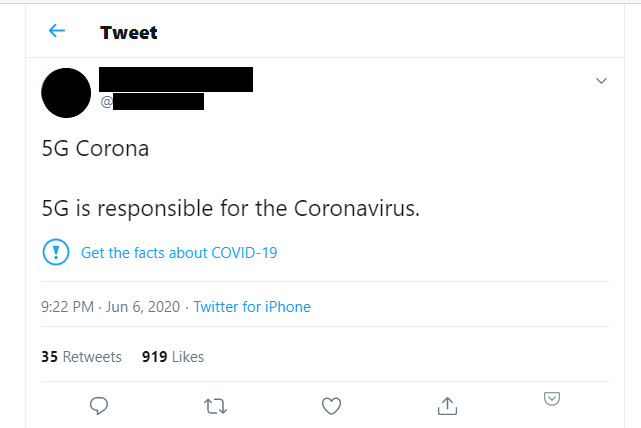

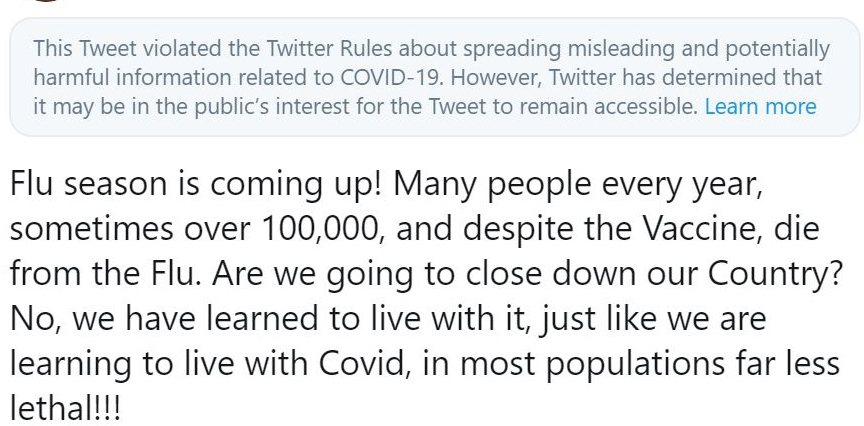

In [ ]:
#adapted from above, because the training data set seemed to have some content about purchasing products
test_fake_1 = '5G Corona 5G is responsible for the Coronavirus, find protection from COVID by purchasing this item.'

test_fake_2 = 'Flu season is coming up! Many people every year, sometimes over 100,000, and despite the Vaccine, die from the Flu. Covid-19 is not dangerous, as long as you buy this lotion from me.'

### Examples of Informative Tweets about COVID

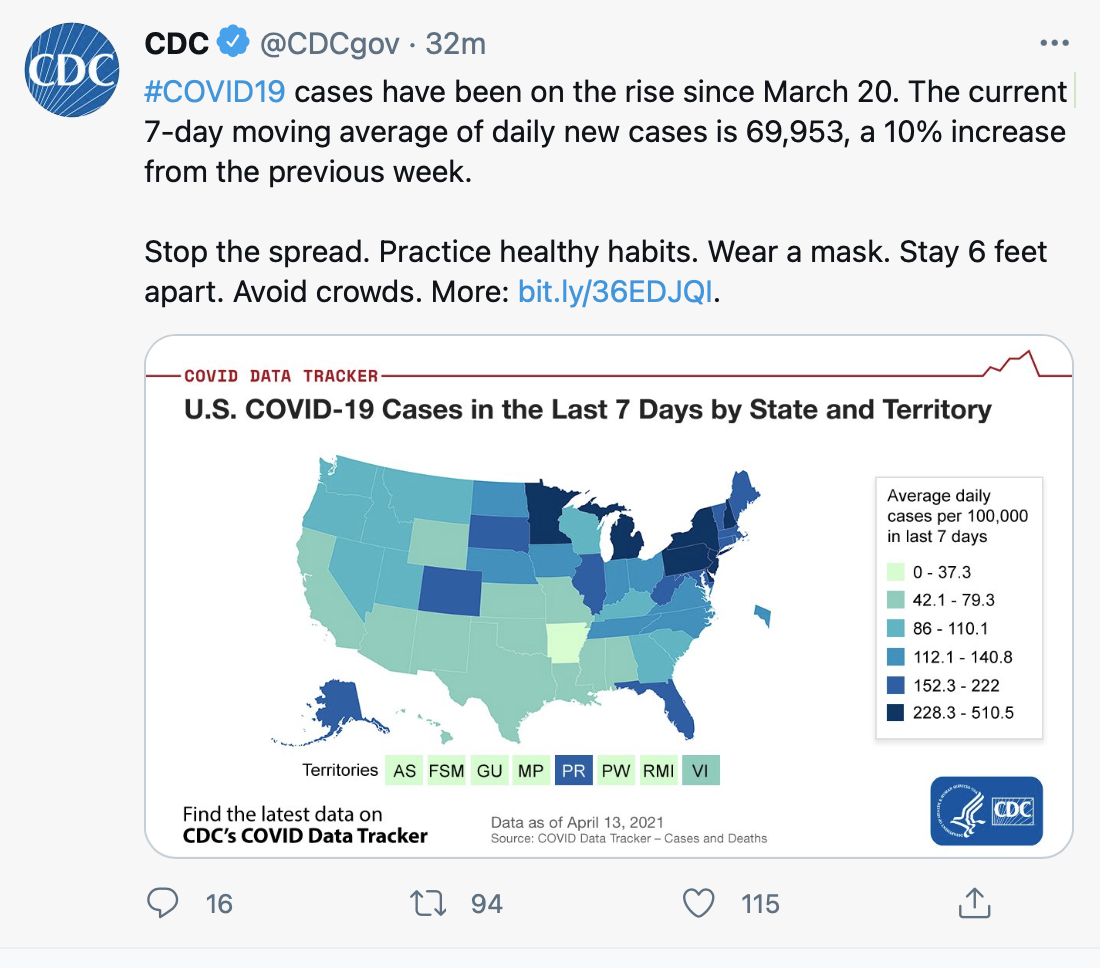

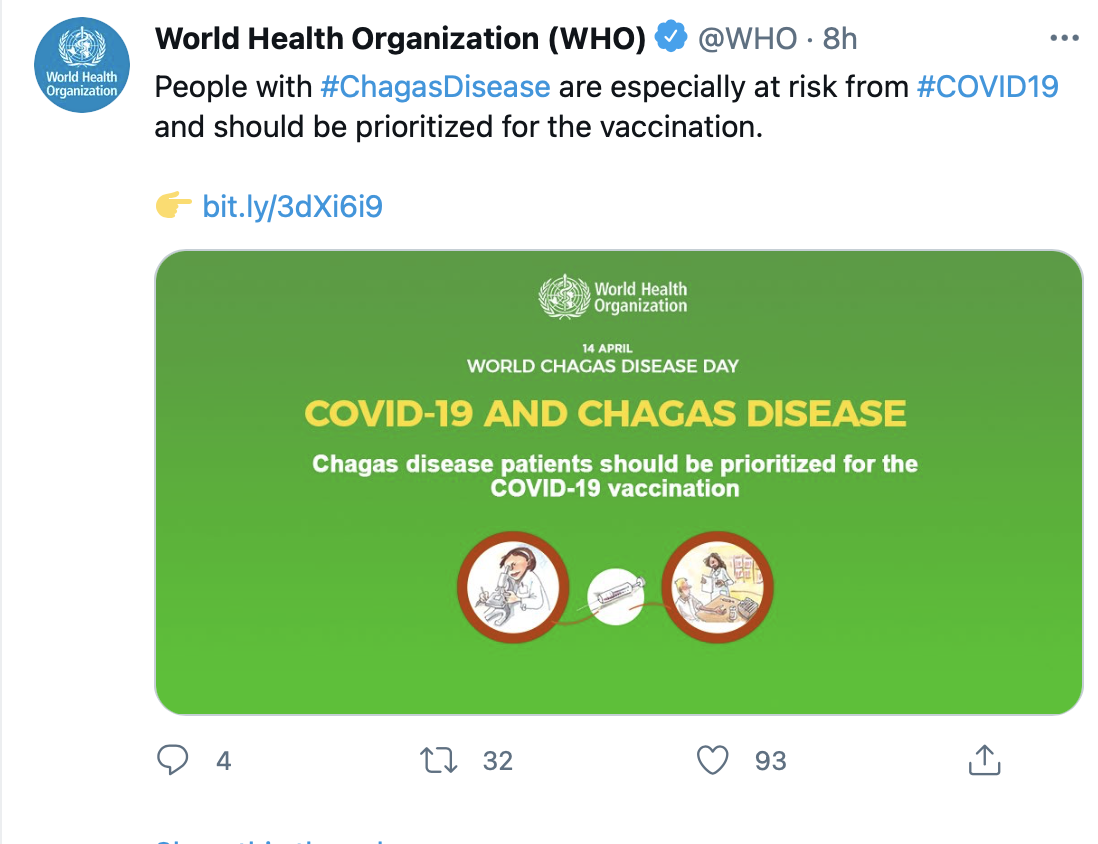

In [ ]:
#adapted from above 
test_real_1 = 'UPDATE: The current 7-day moving average of daily new cases is 69,953, a 10% increase from the previous week. Stop the spread. Practice healthy habits. Wear a mask. Stay 6 feet apart. Avoid crowds.'

test_real_2 = 'UPDATE: People who ChagasDisease are especially at risk from COVID-19 and should be prioritized for the vaccination. Learn more here at this link.'

In [ ]:
tmp_list = []

for x in (test_fake_1, test_fake_2, test_real_1, test_real_2):
  tmp_list.append(x)

In [ ]:
test_df = pd.DataFrame(tmp_list)

In [ ]:
test_df['label'] = ['fake', 'fake', 'real', 'real']

In [ ]:
test_df.columns

Index([0, 'label'], dtype='object')

In [ ]:
test_df.iloc[:, 0]

0    5G Corona 5G is responsible for the Coronaviru...
1    Flu season is coming up! Many people every yea...
2    UPDATE: The current 7-day moving average of da...
3    UPDATE: People who ChagasDisease are especiall...
Name: 0, dtype: object

In [ ]:
y_pred6 = bestmodel.predict(preprocessor(test_df.iloc[:, 0], maxlen=40, max_words=10000)) #applying the same preprocesser as above

In [ ]:
y_pred6

array([[1.0000000e+00, 5.3789811e-15],
       [1.0000000e+00, 3.4400994e-15],
       [1.9733653e-16, 1.0000000e+00],
       [3.4741085e-16, 1.0000000e+00]], dtype=float32)

In [ ]:
prediction_index= np.argmax(y_pred6 ,axis=1)

labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method

predicted_labels6=list(map(lambda x: labels[x], prediction_index))

In [ ]:
test_df['predicted_labels'] = pd.Series(predicted_labels6)

In [ ]:
test_df

,0,label,predicted_labels
0,5G Corona 5G is responsible for the Coronaviru...,fake,fake
1,Flu season is coming up! Many people every yea...,fake,fake
2,UPDATE: The current 7-day moving average of da...,real,real
3,UPDATE: People who ChagasDisease are especiall...,real,real


My best model has correctly classified the tweets.